In [1]:
using Flux,LinearAlgebra,IterTools,Plots,LaTeXStrings

In [2]:
function Df(model, x)
    # x: single datapoint
    m = length(model(x))
    k = sum(length, Flux.params(model)) # Total amount of params

    # Þetta anonymous function reiknar gradient fyrir hvert function í outputinu frá 1:m
    jac = (fi) -> Flux.jacobian(() -> model(x)[fi],Flux.params(model)) # anonymous function

    # Skilgreini tómt Jacobian fylki
    Jacob = zeros(k,m)

    for func_i = 1:m
        current_col = []
        for param_i = 1:length(Flux.params(model))
            push!(current_col, jac(func_i)[Flux.params(model)[param_i]]) # Fyrir hvern parametra W1, B1, W2...
        end
        current_col = collect(Iterators.flatten(current_col)) # Flatten, flet allt
        # --- Spurning hvort hægt sé að gera þetta skilvirkara?
        # --- Held samt að Iterators pakkinn eigi að vera nokkuð skilvirkur

        Jacob[:, func_i] .= current_col # geri current_col að næsta dálka vigri jacobian
    end

    return Jacob # Þetta er Df fylkið í bilblíunni
end

function kernel(model, x)
    # x: dataset
    N = length(x)
    m = length(model(x[1]))  # Number of functions in the model output
    K = zeros(N*m, N*m)

    for i = 1:N
        for j = 1:N
            block = Df(model, x[i])' * Df(model, x[j])
            K[(i-1)*m+1:i*m, (j-1)*m+1:j*m] .= block
        end
    end

    return K
end

kernel (generic function with 1 method)

In [20]:
# nodes on hidden layer
Nh_list = [100, 1000, 10000] 
models = []
activation = sigmoid

InputDim = 2

for Nh in 1:length(Nh_list)
    push!(models,Chain(Dense(InputDim=>Nh_list[Nh],activation),Dense(Nh_list[Nh]=>Nh_list[Nh]),Dense(Nh_list[Nh]=>InputDim))|>f64)
end

x1 = [2;2]
x2 = [2;4]
x3 = [2;4.2]
x4 = [1.92;7]
x5 = [18.02;300]
x6 = [-3;17]
x7 = [312;-0.02]
x = [x1,x2,x3,x4,x5,x6,x7]
Kernels = []
for model in models
    push!(Kernels, kernel(model, x))
end

Kernels_Norms = []

for (i, K) in enumerate(Kernels)
    Nh = Nh_list[i] # Get the corresponding Nh for this kernel
    normalized_K = K / sqrt(Nh) # Normalize the kernel matrix
    push!(Kernels_Norms, normalized_K) # Store the normalized kernel
end

λ_values = Float64.([])
for K in Kernels_Norms
    push!(λ_values, eigen(K).values) # Compute eigenvalues for each kernel and store
end


λ_values
display(length(Kernels_Norms))

3

λ_values[1] = [1.3621185914217324e-8, 1.7224318803124087e-8, 0.0005389880494792778, 0.000581090744660236, 0.07424838376855868, 0.07943826059275859, 1.2256619680496097, 1.4585874510944714, 6.278510284749346, 9.613337386749176, 15.83818027754961, 32.56361994268464, 53.91523230655389, 67.79967633683087]
λ_values[2] = [4.388162480807253e-10, 4.5723576014113593e-10, 3.897016875560062e-6, 4.647124776240397e-6, 0.014610934622421613, 0.01482024446918052, 1.0254332550719243, 1.0913018421351073, 19.913419295447692, 22.331809346533117, 41.681623587819, 43.43289380809617, 185.57310116546202, 191.00637642313305]
λ_values[3] = [1.3759376890100406e-12, 2.7038898771623907e-12, 9.753054747590664e-9, 1.0019521695249427e-8, 0.0018699175055717247, 0.0019058852886076395, 0.19544977573979955, 0.20127761148338089, 46.93760903219672, 48.18550224619831, 71.89310305936361, 73.78612798717069, 555.3269978526793, 566.8063349211253]

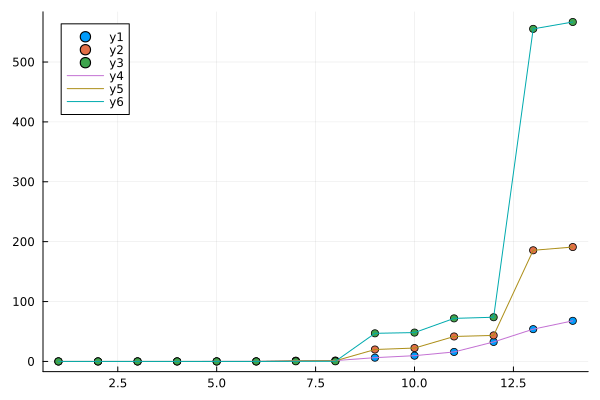

In [22]:
# Start with the first scatter plot
@show λ_values[1]
@show λ_values[2]
@show λ_values[3]

scatter(λ_values)
plot!(λ_values)

In [32]:
bubbi = models[3]

2-element Vector{Float64}:
 -0.270531990094384
 -0.03342983322231097